In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

In [2]:
def odwrotna_dystrybuanta(lambda_t, T, num_simulations=10000):
    # Wygenerowanie zmiennej losowej N_t z rozkładu Poissona
    mean_lambda_integral = np.trapz([lambda_t(t) for t in np.linspace(0, T, 1000)], dx=T/1000)
    poisson_dist = poisson(mu=mean_lambda_integral)
    N_t = poisson_dist.rvs(size=num_simulations)
    
    # Generowanie czasów oczekiwania
    waiting_times = []
    for n in N_t:
        u = np.random.uniform(size=n)
        F_inverse = lambda x: np.searchsorted(np.cumsum([lambda_t(t) / mean_lambda_integral for t in np.linspace(0, T, 1000)]), x)
        waiting_times.extend([F_inverse(ui) for ui in u])
    
    # Sortowanie czasów oczekiwania
    sorted_waiting_times = np.sort(waiting_times)
    
    return sorted_waiting_times

def lambda_t(t):
    return 0.5 + 0.2 * np.sin(2 * np.pi * t / 24)

In [3]:
T = 24

# Symulacja metodą odwrotnej dystrybuanty
sorted_waiting_times = odwrotna_dystrybuanta(lambda_t, T)

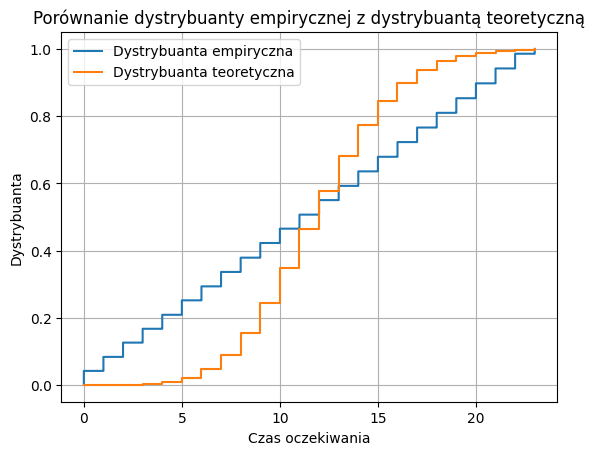

In [4]:
# Wykres dystrybuanty empirycznej
empirical_cdf = np.arange(1, len(sorted_waiting_times) + 1) / len(sorted_waiting_times)
plt.step(sorted_waiting_times, empirical_cdf, label='Dystrybuanta empiryczna', where='post')

# Obliczenie teoretycznej dystrybuanty dla rozkładu Poissona
mean_lambda_integral = np.trapz([lambda_t(t) for t in np.linspace(0, T, 1000)], dx=T/1000)
poisson_dist = poisson(mu=mean_lambda_integral)
x = np.arange(0, max(sorted_waiting_times) + 1)
theoretical_cdf = poisson_dist.cdf(x)

# Wykres dystrybuanty teoretycznej
plt.step(x, theoretical_cdf, label='Dystrybuanta teoretyczna', where='post')

plt.xlabel('Czas oczekiwania')
plt.ylabel('Dystrybuanta')
plt.title('Porównanie dystrybuanty empirycznej z dystrybuantą teoretyczną')
plt.legend()
plt.grid(True)
plt.show()